<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузите-данные-и-подготовьте-их-к-анализу" data-toc-modified-id="Загрузите-данные-и-подготовьте-их-к-анализу-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузите данные и подготовьте их к анализу</a></span></li><li><span><a href="#Задайте-функции-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии." data-toc-modified-id="Задайте-функции-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Маркетинг" data-toc-modified-id="Маркетинг-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Маркетинг</a></span></li><li><span><a href="#Оцените-окупаемость-рекламы" data-toc-modified-id="Оцените-окупаемость-рекламы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Оцените окупаемость рекламы</a></span></li><li><span><a href="#Напишите-выводы" data-toc-modified-id="Напишите-выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Напишите выводы</a></span></li></ul></div>

# Анализ бизесс-показателей



**Описание проекта:**  
Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.  
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.  

Вам предстоит изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов

**Цель проекта:**  
Разобраться в причинах и помочь компании выйти в плюс. Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [ ]:
#импортируем нужные нам библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import time
from datetime import date, timedelta as td

In [2]:
visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
expenses = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')

In [3]:
#смотрим общую информацию о датафрейме и пропуски
display(visits.head())
display(visits.info())
display(visits.duplicated().sum())
visits.isna().sum()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

0

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

In [4]:
#приводим названия. столбцов к стандартному виду
visits.columns = ['user_id','region','device','channel','session_start','session_end' ]
#меняем тип данных в столбцах с датой
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
display(visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None

In [5]:
#смотрим общую информацию о датафрейме и пропуски
display(orders.head())
display(orders.info())
display(orders.duplicated().sum())
orders.isna().sum()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

0

User Id     0
Event Dt    0
Revenue     0
dtype: int64

In [6]:
#приведем названия столбцов к змеиному регистру
orders.columns = ['user_id','event_dt','revenue']
#меняем тип данных
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
display(orders.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

In [7]:
#смотрим общую информацию о датафрейме и пропуски
display(expenses.head())
display(expenses.info())
display(expenses.duplicated().sum())
expenses.isna().sum()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

0

dt         0
Channel    0
costs      0
dtype: int64

In [8]:
#приводим названия столбцов к нижнему регистру
expenses.columns = expenses.columns.str.lower()
#меняеем тип данных
expenses['dt'] = pd.to_datetime(expenses['dt'])
display(expenses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


None

- пропуски отсутствуют
- дубликаты отсутствуют
- поменяли тип данных на соответствующий
- привели названи столбцов к змеиному регистру

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [9]:
#задаем помент и горизон анализа
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

In [10]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [11]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [12]:
#функция для расчета LTV и ROI
def get_ltv(
    profiles,  
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # данные о покупках в профили

    result_raw = result_raw.merge(
        # добавляем в профили время совершения покупок и выручку
        purchases[['user_id', 'event_dt', 'revenue']],
        on='user_id',
        how='left',
    )

    # лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # строим «треугольную» таблицу
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',  # в ячейках — выручка за каждый лайфтайм
            aggfunc='sum',
        )

        # суммы выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)

        # размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # объединием размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # считаем LTV
        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [13]:
# функция для сглаживания фрейм

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [14]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [15]:
#функция для визуализации конверсии
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [16]:
# Функция для визуализации удержания
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(30, 20))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

Создали нужные нам функции

Это функции для вычисления значений метрик:

- get_profiles() — для создания профилей пользователей,
- get_retention() — для подсчёта Retention Rate,
- get_conversion() — для подсчёта конверсии,
- get_ltv() — для подсчёта LTV.

А также функции для построения графиков:

- filter_data() — для сглаживания данных,
- plot_retention() — для построения графика Retention Rate,
- plot_conversion() — для построения графика конверсии,
- plot_ltv_roi — для визуализации LTV и ROI.

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [17]:
#функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

In [18]:
profiles = get_profiles(visits, orders, expenses)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [19]:
#максимальная дата привлечения
display(profiles.first_ts.max())
#минимальная дата привлечения
profiles.first_ts.min()

Timestamp('2019-10-27 23:59:04')

Timestamp('2019-05-01 00:00:41')

Максимальная дата привлечения пользователей - 27 октября 2019 года.  
Минимальная дата привлечения пользователей - 1 мая 2019 года.  
Все отлично, в ТЗ как и надо проверить данные с 1 мая по 27 октября 2019 года

In [20]:
#таблица, отражающую количество пользователей и долю платящих из каждой страны.
profiles_pay = pd.DataFrame()
profiles_pay['users_count'] = profiles.groupby('region')['user_id'].count()
profiles_pay['payer'] = profiles.query('payer == True').groupby('region')['user_id'].count()
profiles_pay['payers_country'] = (profiles_pay['payer']/profiles_pay['users_count'])*100
profiles_pay = profiles_pay.sort_values('payers_country',ascending=False).style.format({'payers_country': '{:.2f}%'})
profiles_pay

,users_count,payer,payers_country
region,,,
United States,100002,6902,6.90%
Germany,14981,616,4.11%
UK,17575,700,3.98%
France,17450,663,3.80%


Больше всего пользователей(100002), плательщиков(6902) и процент плательщиков(6,9)  в США

In [21]:
#таблица, отражающую количество пользователей и долю платящих для каждого устройства.
profiles_device = pd.DataFrame()
profiles_device['dcount'] = profiles.groupby('device')['user_id'].count()
profiles_device['dpayer'] = profiles.query('payer == True').groupby('device')['user_id'].count()
profiles_device['payers_device'] = (profiles_device['dpayer']/profiles_device['dcount'])*100
profiles_device = profiles_device.sort_values('payers_device',ascending=False).style.format({'payers_device': '{:.2f}%'})
profiles_device

,dcount,dpayer,payers_device
device,,,
Mac,30042,1912,6.36%
iPhone,54479,3382,6.21%
Android,35032,2050,5.85%
PC,30455,1537,5.05%


Больше всего пользователей(54479) и плательщиков(3382) пользуются айфонами, а процент плательщиков(6,4) больше всего у владельцев макбука

In [22]:
profiles['channel'].value_counts()

organic               56439
FaceBoom              29144
TipTop                19561
OppleCreativeMedia     8605
WahooNetBanner         8553
LeapBob                8553
RocketSuperAds         4448
MediaTornado           4364
YRabbit                4312
AdNonSense             3880
lambdaMediaAds         2149
Name: channel, dtype: int64

In [23]:
#таблица, отражающуя количество пользователей и долю платящих для каждого канала привлечения.
profiles_pay = pd.DataFrame()
profiles_pay['channel_count'] = profiles.groupby('channel')['user_id'].count()
profiles_pay['channel_payer'] = profiles.query('payer == True').groupby('channel')['user_id'].count()
profiles_pay['payers_channel'] = (profiles_pay['channel_payer']/profiles_pay['channel_count'])*100
profiles_pay = profiles_pay.sort_values('payers_channel',ascending=False).style.format({'payers_channel': '{:.2f}%'})
profiles_pay

,channel_count,channel_payer,payers_channel
channel,,,
FaceBoom,29144,3557,12.20%
AdNonSense,3880,440,11.34%
lambdaMediaAds,2149,225,10.47%
TipTop,19561,1878,9.60%
RocketSuperAds,4448,352,7.91%
WahooNetBanner,8553,453,5.30%
YRabbit,4312,165,3.83%
MediaTornado,4364,156,3.57%
LeapBob,8553,262,3.06%


Больше всего пользователей у FaceBoom(29144) и TipTop(19561), плательщиков так же больше всего у них(3557 и 1878), а вот процент плательщиков чуть-чуть другой FaceBoom(12.20%), AdNonSense(11.34%), lambdaMediaAds(10.47%), TipTop(9.60%)	

- Составили функция для пользовательских профилей
- Максимальная дата привлечения пользователей - 27 октября 2019 года.
Минимальная дата привлечения пользователей - 1 мая 2019 года.
- Больше всего пользователей(100002), плательщиков(6902) и процент плательщиков(6,9) в США
- Больше всего пользователей(54479) и плательщиков(3382) пользуются айфонами, а процент плательщиков(6,4) больше всего у владельцев макбука
- Больше всего пользователей у FaceBoom(29144) и TipTop(19561), плательщиков так же больше всего у них(3557 и 1878), а вот процент плательщиков чуть-чуть другой FaceBoom(12.20%), AdNonSense(11.34%), lambdaMediaAds(10.47%), TipTop(9.60%)

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [24]:
expenses.head(5)

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [25]:
#общая сумму расходов на маркетинг.
expenses.costs.sum().round(1)

105497.3

Общая сумма расходов на маркетинг - 105497,3

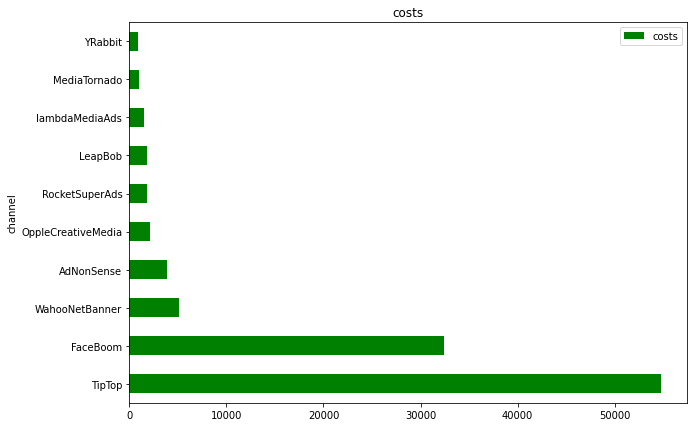

In [26]:
#считаем сколько денег потратили на каждый источник
channel_cost = pd.DataFrame()
channel_cost['costs'] = expenses.groupby('channel')['costs'].sum()
channel_cost = channel_cost.sort_values(by='costs', ascending=False)
channel_cost.plot(kind='barh', subplots=True, figsize=(10, 7),color='green')
plt.show()

- Сильно больше всех потратили на рекламу TipTop(54751.30) и FaceBoom(32445.60)
- Меньше всех потратили MediaTornado(954.48) и YRabbit(944.22)

In [27]:
#Создадим столбец с номером месяца и номером недели
expenses['dt'] = pd.to_datetime(expenses['dt'])
expenses['month'] = expenses['dt'].dt.month
expenses['week'] = expenses['dt'].dt.isocalendar().week
expenses

,dt,channel,costs,month,week
0,2019-05-01,FaceBoom,113.3,5,18
1,2019-05-02,FaceBoom,78.1,5,18
2,2019-05-03,FaceBoom,85.8,5,18
3,2019-05-04,FaceBoom,136.4,5,18
4,2019-05-05,FaceBoom,122.1,5,18
...,...,...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0,10,43
1796,2019-10-24,lambdaMediaAds,6.4,10,43
1797,2019-10-25,lambdaMediaAds,8.8,10,43
1798,2019-10-26,lambdaMediaAds,8.8,10,43


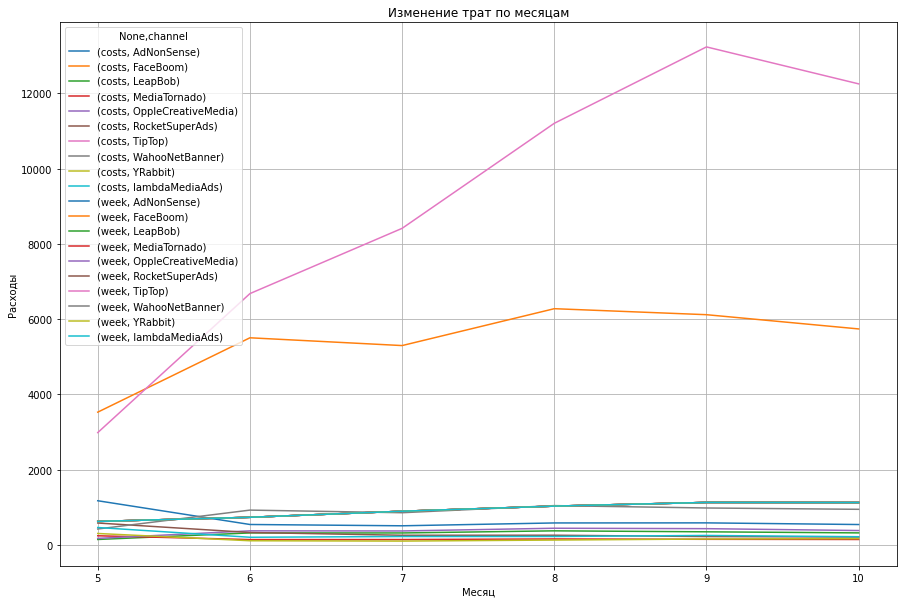

In [28]:
#по месяцам
expenses.pivot_table(
    index='month',
    columns='channel', 
    aggfunc='sum',  
).plot(figsize=(15, 10), grid=True)

plt.title('Изменение трат по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.show()

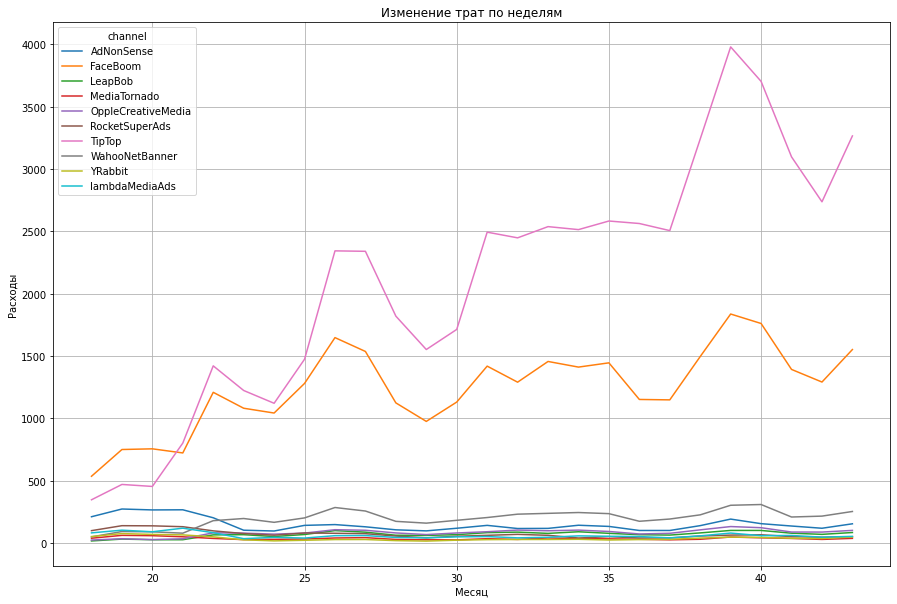

In [29]:
expenses.pivot_table(
    index='week',
    columns='channel',
    values='costs',  
    aggfunc='sum',  
).plot(figsize=(15, 10), grid=True)

plt.title('Изменение трат по неделям')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.show()

- График растет только у TipTop и FaceBoom с пиком в конце сентября, у остальных компаний +- все ровно

In [30]:
#Посмотрим на CAC для каждого источника трафика.
cac_by_channel = pd.DataFrame()
# уберём органических пользователей т.к. их 0:
profiles = profiles.query('channel != "organic"')
cac_by_channel['acquisition_cost_mean'] = profiles.groupby('channel')['acquisition_cost'].mean()
cac_by_channel.sort_values(by='acquisition_cost_mean', ascending=False).style.format({'acquisition_cost_mean': '{:.2f}'})

,acquisition_cost_mean
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


- Из топ3 сильно большой трафик у TipTop(2,8), остальные участиники отстают больше чем в 2,5 раза FaceBoom(1,11) и AdNonSense(1,01) 

In [31]:
# средний CAC без organic
cac_mean = (profiles.query('channel != "organic"').agg({'acquisition_cost': 'mean'}))
round(cac_mean, 2)

acquisition_cost    1.13
dtype: float64

- средний сас - 1.13

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

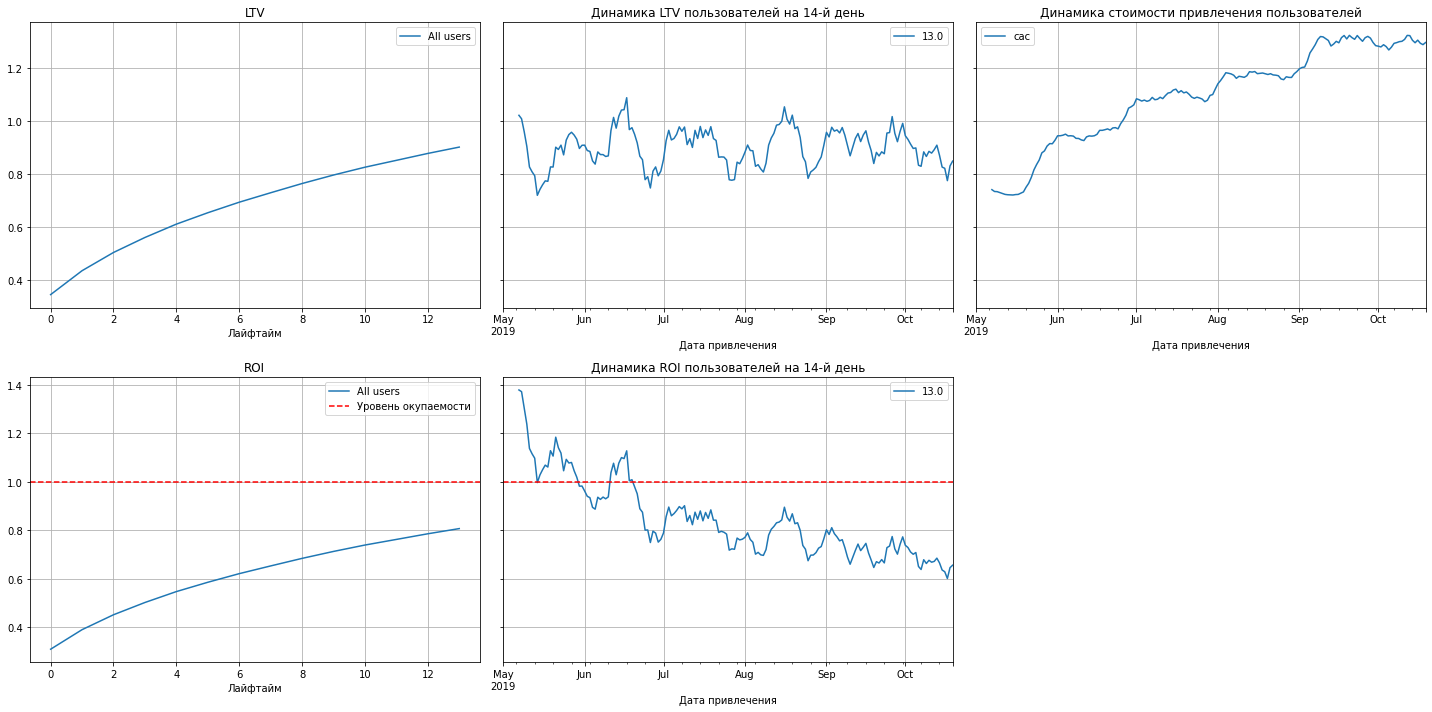

In [32]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

- LTV примерно одном уровне на протяжении всего эксперимента
- CAC  растёт
- ROI не доходит до уровня окупаемости
- Пользователи перестают окупаться уже в середине июня

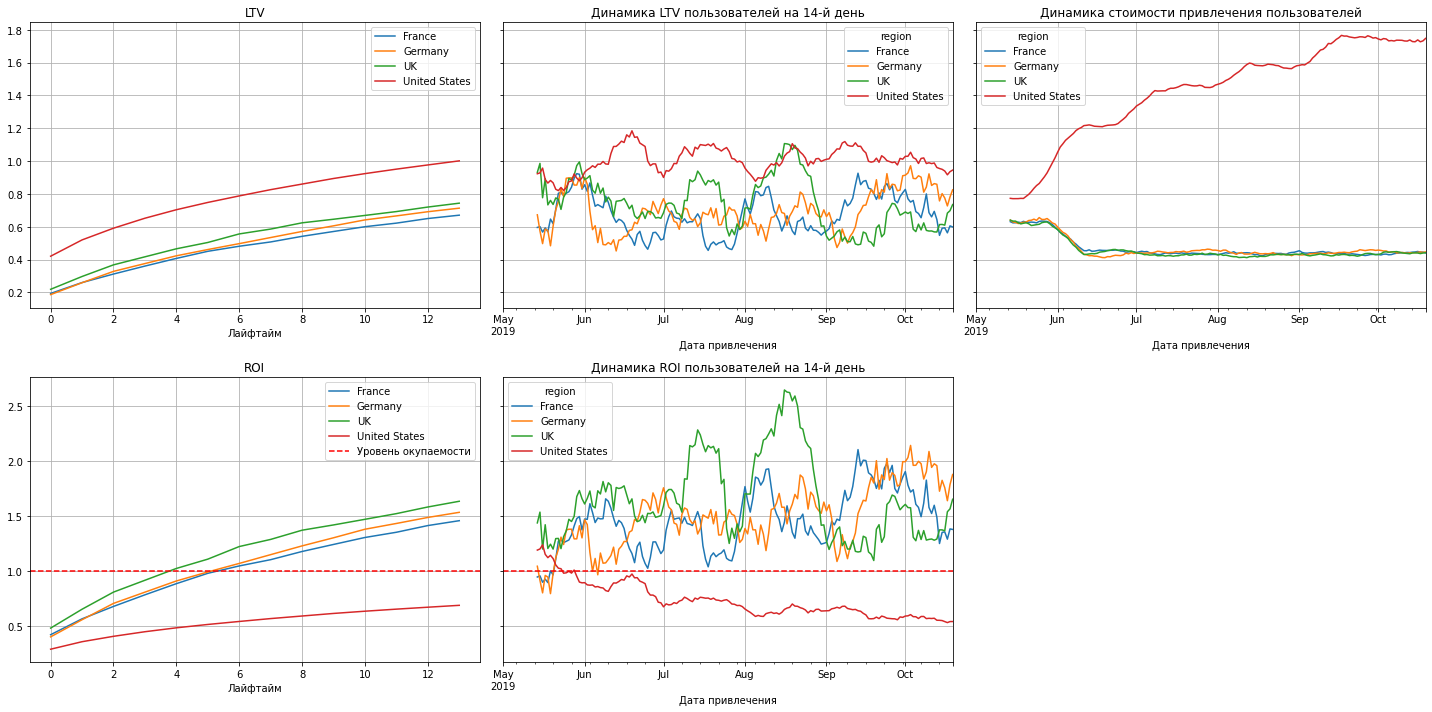

In [33]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

- не окупается только США(примерно 60% окупаемости), они же сильно больше всех тратят на рекламу

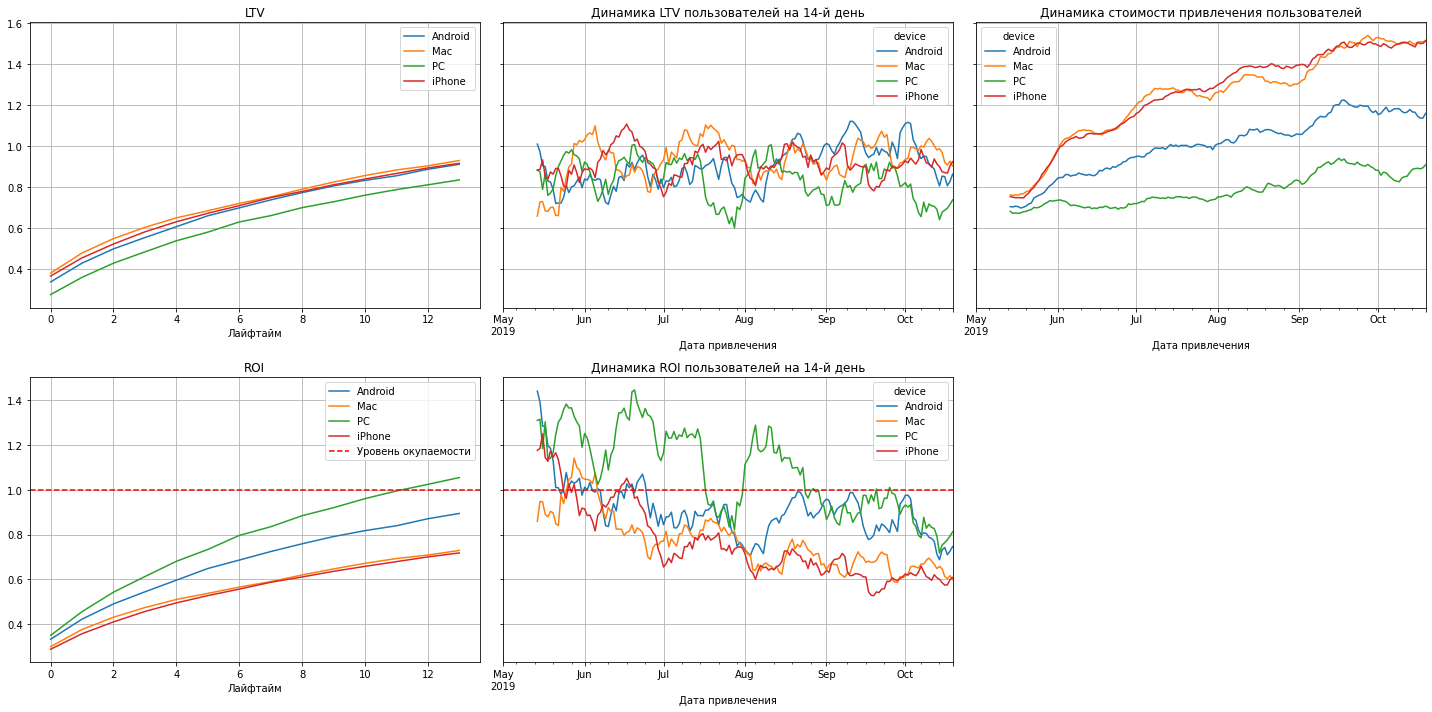

In [34]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

- больше всего стоимость привлечения у айфона и мака
- айфон и мак не окупается
- окупается только PC и возможно в ближайшем будущем Android

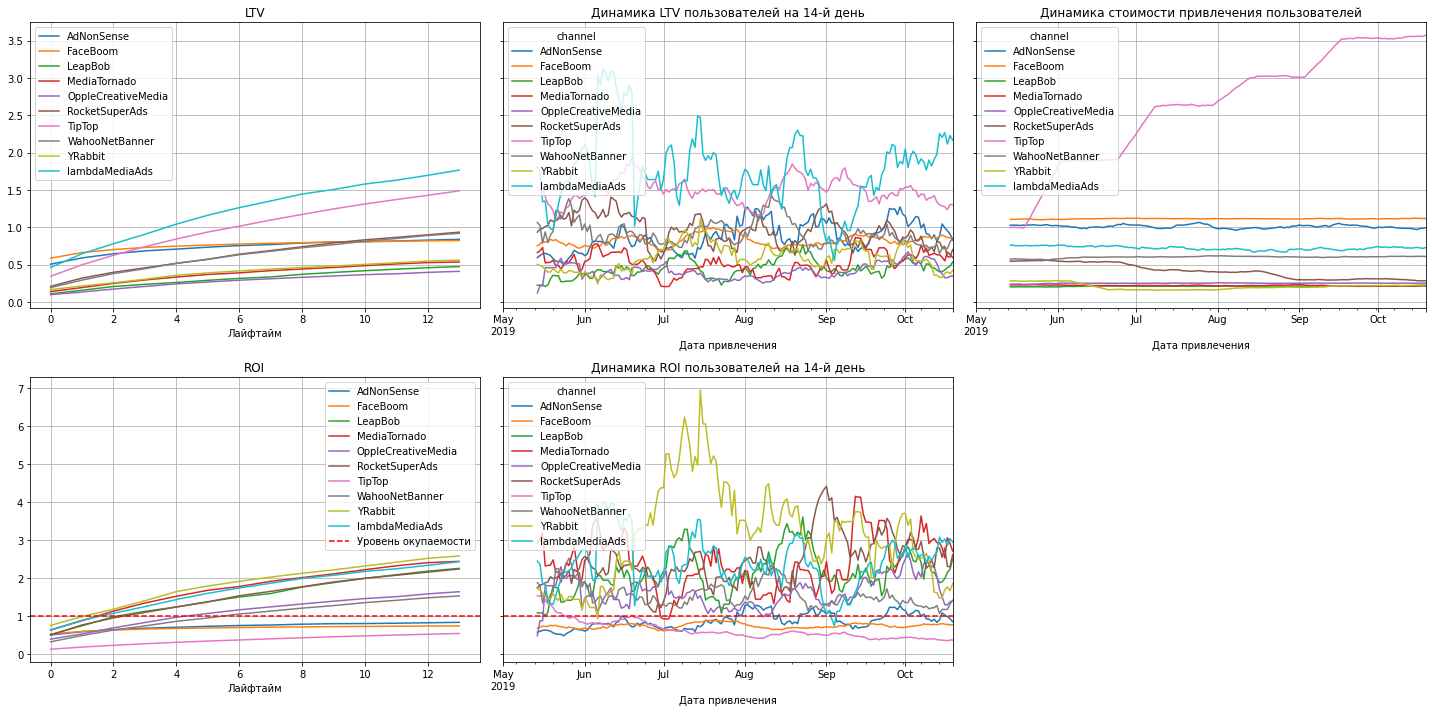

In [35]:
# смотрим окупаемость с разбивкой по каналам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 


- LTV на каналах различается  
- динамика стоимости привлечения пользователей растёт только у TipTop  
- Не окупаются к концу 2 недели пользователи из каналов: TipTop, FaceBoom, AdNonSense  

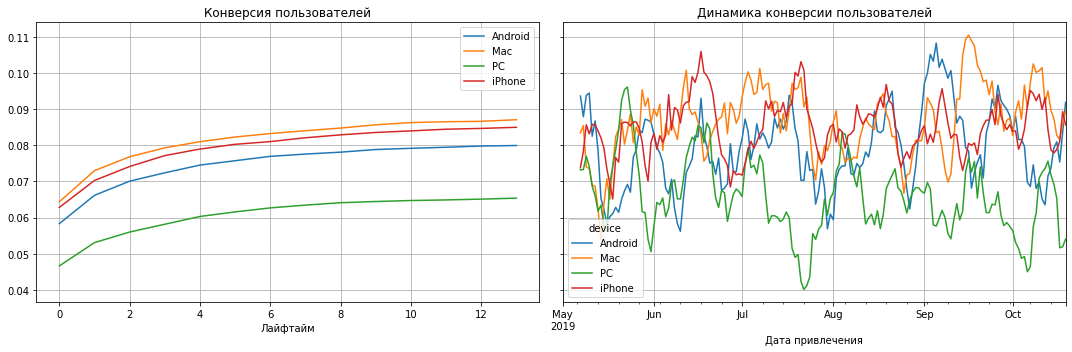

In [36]:
# конверсия с разбивкой по устройствам
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

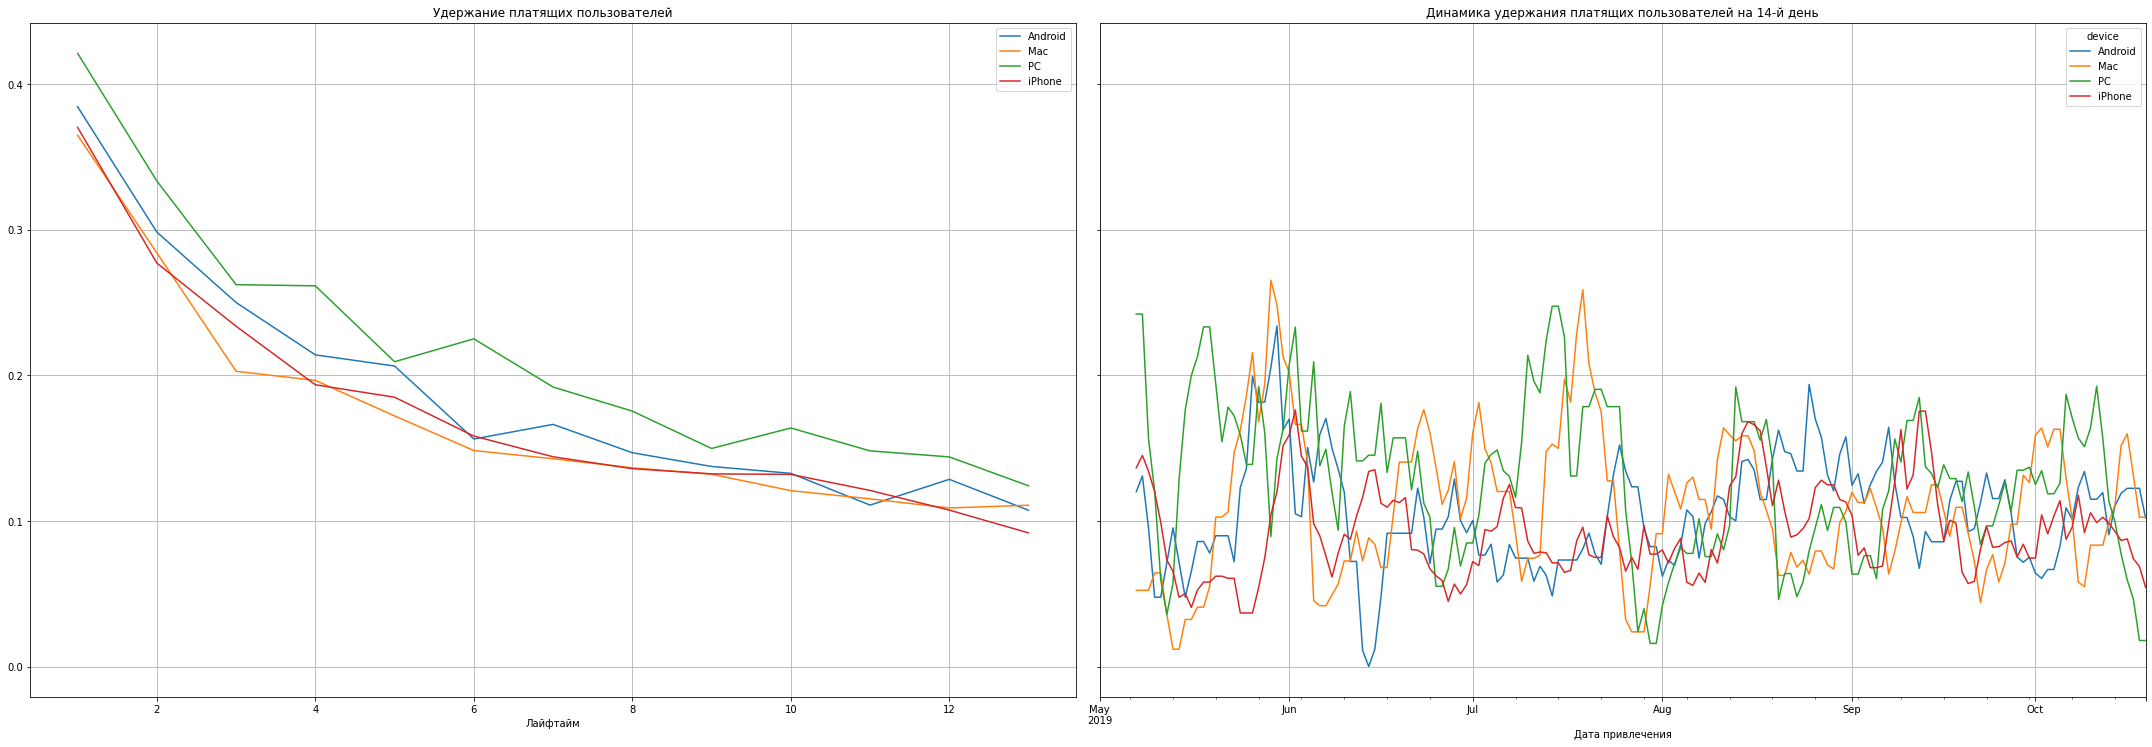

In [37]:
# удержание с разбивкой по устройствам
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

- по конверсии Мак и Айфон в лидерах, чуть отстает Андроид и сильно отстает PC, а по удержанию у PC дела идут чуть лучше чем у остальных

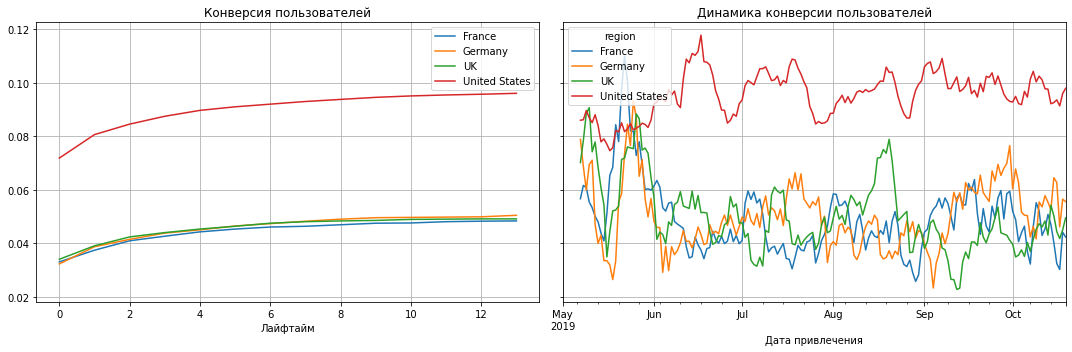

In [38]:
# конверсия с разбивкой по регионам
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

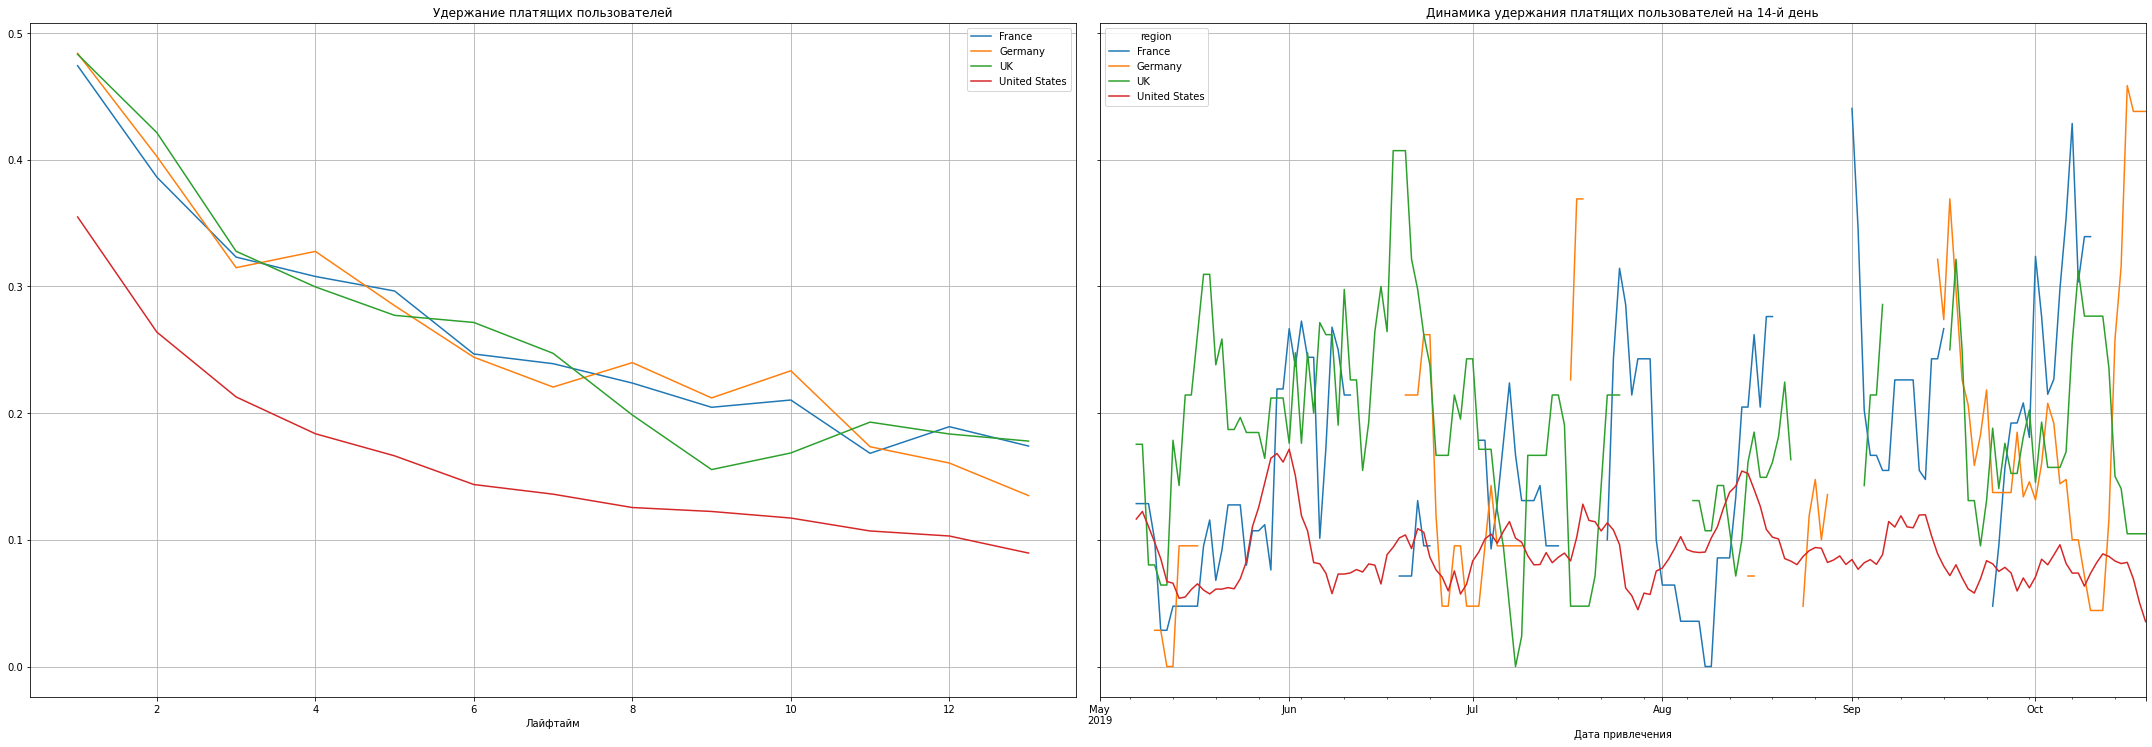

In [39]:
# удержание с разбивкой по регионам
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

- США примерно в 2 раза опережают по конверсии, остальные страны +- одинаково, а по удержанию США хуже всех, остальные идут +- одинаково

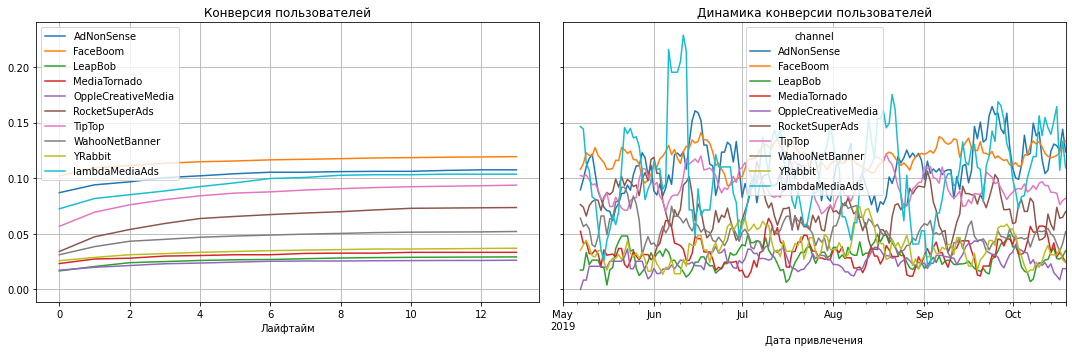

In [40]:
# конверсия с разбивкой по каналам
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

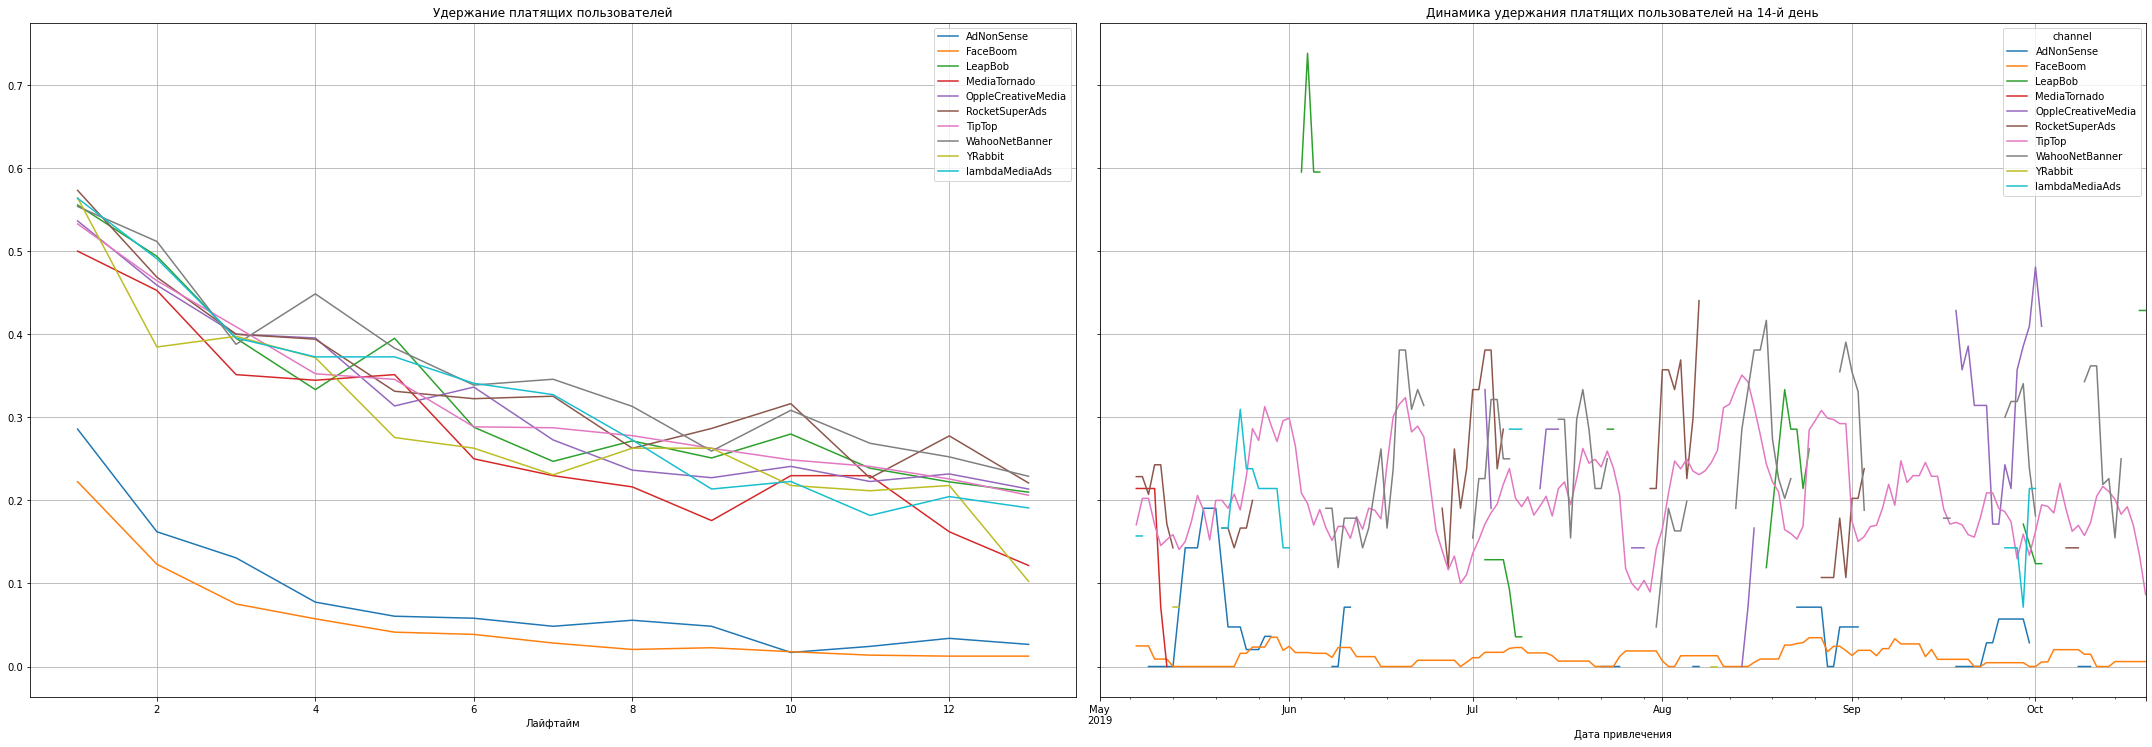

In [41]:
# удержание с разбивкой по каналам
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

In [42]:
expenses.channel.unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

- по конверсии лидер FaceBoom, так же в топ 4 находятся:AdNonSense,lambdaMediaAds,TipTop, а по удеражнию сильно хуже всех FaceBoom,AdNonSense

В целом часто получается что у тех у кого хорошая конверсия-плохое удержание

Ответьте на такие вопросы:

**1.Окупается ли реклама в целом?**
- В целом не окупается  

**2.Какие устройства, страны и каналы могут снижать окупаемость рекламы?**
- Из стран больше всего снижает окупаемость рекламы - США 
- Из каналов - TipTop, FaceBoom, AdNonSense
- Из устройств IPhone и MAC  

**3.Чем могут быть вызваны проблемы окупаемости?**
- Тем что слишком много денег тратят на рекламу + вкладывают не в те устройства  

**4.Опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела**
 - Я думаю надо сделать больше упор на пользователе PC и Android, сократить расходы на рекламу в США

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

**1. Загрузить данные и подготовьте к анализу**  

- пропуски отсутствуют
- дубликаты отсутствуют
- поменяли тип данных на соответствующий
- привели названи столбцов к змеиному регистру  

**2. Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии**  

Создали нужные нам функции
Это функции для вычисления значений метрик:

- get_profiles() — для создания профилей пользователей,
- get_retention() — для подсчёта Retention Rate,
- get_conversion() — для подсчёта конверсии,
- get_ltv() — для подсчёта LTV.

А также функции для построения графиков:

- filter_data() — для сглаживания данных,
- plot_retention() — для построения графика Retention Rate,
- plot_conversion() — для построения графика конверсии,
- plot_ltv_roi — для визуализации LTV и ROI.  

**3. Исследовательский анализ данных**  

- Составили функция для пользовательских профилей
- Максимальная дата привлечения пользователей - 27 октября 2019 года.
Минимальная дата привлечения пользователей - 1 мая 2019 года.
- Больше всего пользователей(100002), плательщиков(6902) и процент плательщиков(6,9) в США
- Больше всего пользователей(54479) и плательщиков(3382) пользуются айфонами, а процент плательщиков(6,4) больше всего у владельцев макбука
- Больше всего пользователей у FaceBoom(29144) и TipTop(19561), плательщиков так же больше всего у них(3557 и 1878), а вот процент плательщиков чуть-чуть другой FaceBoom(12.20%), AdNonSense(11.34%), lambdaMediaAds(10.47%), TipTop(9.60%)  

**4. Маркетинг** 

- Общая сумма расходов на маркетинг - 105497,3  
- Сильно больше всех потратили на рекламу TipTop(54751.30) и FaceBoom(32445.60)
- Меньше всех потратили MediaTornado(954.48) и YRabbit(944.22)  
- График затрат на рекламу растет только у TipTop и FaceBoom с пиком в конце сентября, у остальных компаний +- все ровно  
- Средний сас - 1.13
- Из топ3 сильно большой трафик у TipTop(2,8), остальные участиники отстают больше чем в 2,5 раза FaceBoom(1,11) и AdNonSense(1,01)

**5. Оцените окупаемость рекламы**

- LTV примерно одном уровне на протяжении всего эксперимента
- CAC  растёт
- ROI не доходит до уровня окупаемости
- Пользователи перестают окупаться уже в середине июня
- не окупается только США(примерно 60% окупаемости), они же сильно больше всех тратят на рекламу  
- больше всего стоимость привлечения у айфона и мака
- айфон и мак не окупается
- окупается только PC и возможно в ближайшем будущем Android
- LTV на каналах различается  
- динамика стоимости привлечения пользователей растёт только у TipTop  
- Не окупаются к концу 2 недели пользователи из каналов: TipTop, FaceBoom, AdNonSense  
- США примерно в 2 раза опережают всех по конверсии, остальные страны +- одинаково, а по удержанию США хуже всех, остальные идут +- одинаково
- по конверсии Мак и Айфон в лидерах, чуть отстает Андроид и сильно отстает PC, а по удержанию у PC дела идут чуть лучше чем у остальных
- по конверсии лидер FaceBoom, так же в топ 4 находятся:AdNonSense,lambdaMediaAds,TipTop, а по удеражнию сильно хуже всех FaceBoom,AdNonSense

**Рекомендации отделу маркетинга**

- Привлекать больше пользователей из разных стран(кроме США)
- Привлекать больше Android и PC пользователей
- Как показал аннализ реклама для привлечения пользователей не окупила сама себя. Выявленной проблемой бюджетирования оказались чрезмерные расходы на привлечение пользователей.
- Рекламному отделу развлекательного приложения Procrastinate Pro+ рекомендуется сократить финансирование на маркетинг там, где стоимость привлечения слишком большая - это расходы на пользователей из США и канал TipTop. В США пользователи всех устройств не принесли достаточно прибыли, хотя расходы на их привлечение постоянно росли, что также стоит учесть при принятии финансовых решений, целесообразны ли траты в таком объеме.
- В целом, реклама в привлечение пользователей не окупилась, отсюда и убытки. При анализе расходов и окупаемости в разрезе по странам, устройствам и каналам выявлено, что причиной обнаруженных проблем являются чрезмерные расходы на привлечение пользователей. Стоимость рекламы должна быть оптимальной. Можно выделить следующие удачные каналы для привлечения клиентов: Yrabbits, TipTop, RocketSuperAds

In [43]:
expenses.channel.unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)